<a href="https://colab.research.google.com/github/karou1182001/NLPAssigments/blob/main/Assigment2/NLPAssigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preguntas:
-El dataset que debemos usar es el mismo que el usa en los ejemplos del Github  Rta: Si
- Que cosas debemos comparar al comparar char level y word level y por que me dan los resultados asi
- No se que se supone que debo cambiar en el modelo

# 1. Initial Setup


## Set Random Seeds:
Ensure reproducibility by setting seeds for all random number generators (e.g., Python’s random, NumPy, TensorFlow/PyTorch).

In [2]:
import random
import numpy as np
import torch
import tensorflow as tf

# Set random seed to 42
SEED = 1234

# Python random
random.seed(SEED)

# NumPy
np.random.seed(SEED)

# PyTorch
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# TensorFlow
tf.random.set_seed(SEED)

print("Confirmation")


Confirmation


## Prepare the Environment:

Create a new or update an existing Jupyter Notebook.
Ensure that all necessary libraries (e.g., NumPy, pandas, TensorFlow/PyTorch, matplotlib, etc.) are installed.

In [3]:
!pip install numpy pandas matplotlib seaborn torch torchvision tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# 2. Preprocessing

## Load Dataset:
Load your dataset into the notebook.



In [28]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

# -------------------------------
# Load and Prepare the IMDB Dataset
# -------------------------------
print("Loading IMDB dataset...")
# Load the IMDB reviews dataset with the 'as_supervised' flag so that we get (text, label) pairs.
(ds_train, ds_test), ds_info = tfds.load('imdb_reviews',
                                           split=['train', 'test'],
                                           as_supervised=True,
                                           with_info=True)

# Convert training dataset to lists.
train_texts = []
train_labels = []
for text, label in tfds.as_numpy(ds_train):
    # Decode byte strings to utf-8 strings.
    train_texts.append(text.decode('utf-8'))
    train_labels.append(label)
train_labels = np.array(train_labels)

# Create a validation set from the training data (20% for validation).
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels, test_size=0.2, random_state=42)

# Convert test dataset to lists.
test_texts = []
test_labels = []
for text, label in tfds.as_numpy(ds_test):
    test_texts.append(text.decode('utf-8'))
    test_labels.append(label)
test_labels = np.array(test_labels)

print(f"Train samples: {len(train_texts)}, Validation samples: {len(val_texts)}, Test samples: {len(test_texts)}")


Loading IMDB dataset...
Train samples: 20000, Validation samples: 5000, Test samples: 25000


## Tokenization:





### Character-Level Tokenization:
Tokenize the text data at the character level.
Save and log the processed data.


In [33]:
# -------------------------------
# Character-Level Tokenizer and Preprocessing Functions
# -------------------------------
def char_level_tokenizer(texts, num_words=None):
    """
    Create and fit a character-level tokenizer.

    Args:
        texts (list of str): List of texts.
        num_words (int or None): Maximum number of tokens to keep.

    Returns:
        tokenizer: A fitted Tokenizer instance.
    """
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words, char_level=True, lower=True)
    tokenizer.fit_on_texts(texts)
    return tokenizer

def texts_to_bow(tokenizer, texts):
    """
    Convert texts to a bag-of-characters representation.

    Args:
        tokenizer: A fitted character-level Tokenizer.
        texts (list of str): List of texts.

    Returns:
        Numpy array representing the binary bag-of-characters for each text.
    """
    # texts_to_matrix with mode 'binary' produces a fixed-length binary vector per text.
    matrix = tokenizer.texts_to_matrix(texts, mode='binary')
    return matrix

def one_hot_encode(labels, num_classes=2):
    """
    Convert numeric labels to one-hot encoded vectors.
    Convierte las palabras categorigas en un formato numerico
    """
    return np.eye(num_classes)[labels]

# -------------------------------
# Preprocessing: Tokenization and Vectorization
# -------------------------------

# Build the character-level tokenizer on the training texts.
tokenizer = char_level_tokenizer(train_texts)
print("Tokenizer vocabulary size:", len(tokenizer.word_index) + 1)

# Convert texts to bag-of-characters representation.
X_train = texts_to_bow(tokenizer, train_texts)
X_val   = texts_to_bow(tokenizer, val_texts)
X_test  = texts_to_bow(tokenizer, test_texts)

# Convert labels to one-hot encoding.
y_train = one_hot_encode(train_labels)
y_val   = one_hot_encode(val_labels)
y_test  = one_hot_encode(test_labels)

Tokenizer vocabulary size: 134


### Word-Level Tokenization:
Modify the tokenization process to tokenize the text by words.
Save and log the processed data.

In [34]:
# -------------------------------
# Word-Level Tokenizer and Preprocessing Functions
# -------------------------------
def word_tokenizer(texts, num_words=None):
    """
    Create and fit a word-level tokenizer.

    Args:
        texts (list of str): List of texts.
        num_words (int or None): Maximum number of tokens to keep.

    Returns:
        tokenizer: A fitted Tokenizer instance.
    """
    #We put char_level= False to be word level
    wordTokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words, lower=True)
    wordTokenizer.fit_on_texts(texts)
    return wordTokenizer

#New function I added
def texts_to_sequences(wordTokenizer, texts):
    """
    Convert texts to padded sequences of word indices.
    """
    sequences = wordTokenizer.texts_to_sequences(texts)
    return tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post')

# -------------------------------
# Preprocessing: Tokenization and Vectorization
# -------------------------------

# Build the word-level tokenizer on the training texts.
wordTokenizer = word_tokenizer(train_texts)
print("Word Tokenizer vocabulary size:", len(wordTokenizer.word_index) + 1)

# Convert texts to sequences.
X_train_word = texts_to_sequences(wordTokenizer, train_texts)
X_val_word   = texts_to_sequences(wordTokenizer, val_texts)
X_test_word  = texts_to_sequences(wordTokenizer, test_texts)



Word Tokenizer vocabulary size: 80169


## Comparison:

Create a section in your notebook to compare the two tokenization approaches.
Visualize or tabulate differences in vocabulary size, sequence lengths, and other relevant metrics.

Character level vocabulary size: 134
Word level vocabulary size: 80169
Avg char level sequence length: 134.0
Avg word level sequence length: 1853.0


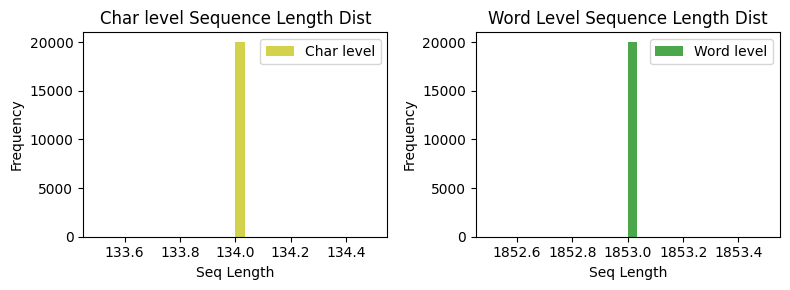

In [35]:
import matplotlib.pyplot as plt
# -------------------------------
# Comparison Between Tokenization Approaches
# -------------------------------
charSize = len(tokenizer.word_index) + 1
wordSize = len(wordTokenizer.word_index) + 1

charseqLen = [len(seq) for seq in X_train]
wordseqLen = [len(seq) for seq in X_train_word]


print("Character level vocabulary size:", charSize)
print("Word level vocabulary size:", wordSize)
print("Avg char level sequence length:", np.mean(charseqLen))
print("Avg word level sequence length:", np.mean(wordseqLen))

# Visualization
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.hist(charseqLen, bins=30, alpha=0.7, color='y', label='Char level')
plt.xlabel('Seq Length')
plt.ylabel('Frequency')
plt.title('Char level Sequence Length Dist')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(wordseqLen, bins=30, alpha=0.7, color='g', label='Word level')
plt.xlabel('Seq Length')
plt.ylabel('Frequency')
plt.title('Word Level Sequence Length Dist')
plt.legend()

plt.tight_layout()
plt.show()


Analizing, the results makes sense since a text has more characters than words. And also, makes sense that the vocabulary size of the words is smalles that the vocabulary size of the characters.

# 3. Model Architecture


## Define the Model:
Develop a model (or models) that can handle both tokenization types. Include the following adjustable hyper-parameters:


*   Learning rate
*   Number of hidden layers
*   Hidden sizes (neurons per layer)
*   Batch sizes
*   Optimizers (e.g., Adam, SGD, RMSProp)
*   Activation functions (e.g., ReLU, Tanh, LeakyReLU)

In [39]:
# -------------------------------
# Model Setup
# -------------------------------
class MLP(object):
    def __init__(self, size_input, size_hidden1, size_hidden2, size_hidden3, size_output, device=None):
        """
        size_input: int, size of input layer
        size_hidden1: int, size of the 1st hidden layer
        size_hidden2: int, size of the 2nd hidden layer
        size_hidden3: int, size of the 3rd hidden layer (not used in compute_output here)
        size_output: int, size of output layer
        device: str or None, either 'cpu' or 'gpu' or None.
        """
        self.size_input = size_input
        self.size_hidden1 = size_hidden1
        self.size_hidden2 = size_hidden2
        self.size_hidden3 = size_hidden3  # (Currently not used in the forward pass)
        self.size_output = size_output
        self.device = device

        # Initialize weights and biases for first hidden layer
        self.W1 = tf.Variable(tf.random.normal([self.size_input, self.size_hidden1], stddev=0.1))
        self.b1 = tf.Variable(tf.zeros([1, self.size_hidden1]))

        # Initialize weights and biases for second hidden layer
        self.W2 = tf.Variable(tf.random.normal([self.size_hidden1, self.size_hidden2], stddev=0.1))
        self.b2 = tf.Variable(tf.zeros([1, self.size_hidden2]))

        # Initialize weights and biases for output layer
        self.W3 = tf.Variable(tf.random.normal([self.size_hidden2, self.size_output], stddev=0.1))
        self.b3 = tf.Variable(tf.zeros([1, self.size_output]))

        # List of variables to update during backpropagation
        self.variables = [self.W1, self.W2, self.W3, self.b1, self.b2, self.b3]


# The input size is determined by the dimension of the bag-of-characters vector.
size_input = X_train.shape[1]
# Set hidden layer sizes as desired.
size_hidden1 = 128
size_hidden2 = 64
size_hidden3 = 32  # Placeholder (not used in the forward pass)
size_output  = 2

# Instantiate the MLP model.
model = MLP(size_input, size_hidden1, size_hidden2, size_hidden3, size_output, device=None)

# Define the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)